# Modelo Preditivo para Doenças Cardiovasculares

<img src='image/insper-cover.png'>

## ENG, 2020.2 - INSPER
### Ciência dos Dados
Alunos:
- Guilherme Rosada
- Jamesson Leandro Paiva Santos

Professoras Orientadoras:
- Maria Kelly Venezuela
- Bárbara Agena 


## Sumário:

- 
- 
- 

______
<h2> Uma breve contextualização </h2>

<font color=red> Por uma pequena contextualização referente aos dados de números de Doenças Cardiovasculares no mundo e a necessidade de se fazer previsões de risco de doenças, tanto para os planos de saúde / seguradoras (para precificarem corretamente o valor dos planos/seguros), para os hospitais (para prepararem sua equipe e estrutura) e para os governos (a fim de criarem movimentos educativos ou de investirem em prevenção) </font>

Doenças cardiovasculares, de maneira geral, são distúrbios associados tanto ao funcionamento do coração quanto ao dos vasos sanguíneos, os quais atuam no sistema circulatório do corpo humano. A maior parte desses problemas são crônicos, isto é, desenvolvem-se ao longo dos anos, e, por isso, afetam majoritariamente grupos acima dos 40 anos de idade. A desenvoltura dessas doenças pode levar a sérias complicações de saúde, como risco de insuficiência cardíaca, acidente vascular cerebral (AVC) e infartos.

Os problemas cardíacos são mais frequentes em homens que em mulheres, ocorrendo principalmente na faixa etária acima de 50 anos. Os fatores que podem levar ao surgimento dessas doenças são diversos, mas pode-se destacar a existência de diabetes, hipertensão e altos índices de colesterol no sangue como agravantes, pois, geralmente, os distúrbios no coração ocorrem devido ao surgimento de obstáculos (acúmulo de gordura) nos vasos sanguíneos. Normalmente, esses fatores podem ser controlados quando se adotam hábitos de vida mais saudáveis (evitar bebidas alcóolicas e tabaco em uso recorrente, manter uma alimentação balanceada e uma constância na prática de atividades físicas, por exemplo). [*ref](https://www.paho.org/pt/topicos/doencas-cardiovasculares)

Entre as várias doenças cardiovasculares que existem, as mais frequentes são:
- Hipertensão (pressão alta)
- Infarto agudo ou miocárdio (mais conhecido como ataque cardíaco)
- Angina de peito (desconforto no peito, pode ser sintoma de algo mais grave)
- Doenças nas válvulas cardíacas
- Doenças cardíacas congênitas
- Endocardite (inflamação no revestimento interno do coração e das válvulas cardíacas)
- Arritmias cardíacas
- Miocardite
- Tumores no coração.

<h3>O que será trabalhado neste notebook</h3>

A plataforma Kaggle disponibiliza uma variedade imensa de *datasets* para competições de *data science* e *machine learning*. Para este trabalho, será utilizada o ['Cardiovascular Disease Dataset'](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset) que contém alguns dados (que você verá logo no tópico a seguir) coletados no momento do exame de uma grande quantidade de pacientes. 

A partir desses dados, serão construído três modelos preditivos que respondam à seguinte pergunta: `a partir de um conjunto de informações sobre o paciente, ele terá ou não alguma doença cardiovascular?`

Esses modelos serão construidos utilizando a bilbioteca [scikit-learning](https://scikit-learn.org/stable/), que contém uma vasta quantidade de ferramentas de *machine learning* que ajudarão a fazer predições que auxiliem na formulação da resposta da pergunta acima. Ainda, esses modelos serão confrontados entre si quanto à acurácia obtida por cada um e será feita uma breve discussão sobre esses resultados.

Antes de começar, será necessário importar todas as bilbiotecas e módulos python necessários ao desenvolvimento do projeto.

In [1]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização gráfica dos dados
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Configurações de Exibição dos Gráficos:
sns.set_theme()
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})

# Modelos preditivos
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Módulos complementares para os modelos preditivos
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

______
<h2> Tratamento da Base de Dados </h2>

A base dados contém algumas informações coletadas de vários pacientes no momento do exame. A seguir, estão descritas as informações originais contidas no [*dataset*](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset):

- `idade`: idade do paciente (em dias) $\rightarrow$ (será convertida para `anos`) 
- `altura`: altura do paciente (em centímetros) $\rightarrow$ (será convertida para `metros`)
- `peso`: peso ou massa corporal do paciente(em `kg`)
- `genero`: gênero, em que
    - 1: masculino
    - 2: feminino
- `pa_sist`: Pressão arterial sistólica - recurso de exame (em `mmHg`)
- `pa_diast`: Pressão arterial diastólica - recurso de exame (em `mmHg`)
- `colesterol`: nível de colesterol, em que:
    - 1: normal 
    - 2: acima do normal 
    - 3: muito acima normal
- `glicose`: Glicose - recurso de exame, em que
    - 1: normal
    - 2: acima do normal
    - 3: muito acima do normal
- `fumante`: classificação do paciente quanto ao hábito de fumar: 
    - 0: não fumante
    - 1: fumante
- `alcool`: classificação do paciente quanto ao hábito de Ingestão alcoólica de forma recorrente:
    - 0: não consome
    - 1: consome
- `a_fisica`: classificação do paciente quanto à prática de atividade física
    - 0: não praticante
    - 1: praticante
- `cardio`: Presença ou ausência de doença cardiovascular
    - 0: ausente
    - 1: presente
    
As variáveis acima encontram-se originalmente em inglês no *dataset*, porém, serão traduzidas pra o Português neste trabalho. 

A variável *target* será a `cardio`, pois é ela quem classifica o paciente como portador ou não de doença cardiovascular. Logo, ela é a variável dependente (pois seu valor dependerá do valor de todas as outras, denominadas independentes).

Além disso, é necessário fazer ainda uma série de manipulações no *dataset* antes de iniciar os trabalhos efetivamente. Dessa forma, algumas mudanças necessárias serão:

- traduzir os *labels*
- converter unidades da `idade` de dias para anos
- converter unidades da `altura` de centímetros para metros
- atribuir as categorias às variáveis categóricas (na descrição acima, note que alguns dados vêm classificados como 0 ou 1, por exemplo)
- verificar e filtrar *outliers* (dados que destoam completamente do padrão observados ou que são inconsistentes com a realidade)

In [2]:
# Leitura da base de dados:
dados = pd.read_csv('./data/cardio_data.csv', delimiter=';')

# Tradução dos labels para Português:
dados.columns = ['id', 'idade', 'genero', 'altura', 'peso', 'pa_sist', 'pa_diast',
                 'colesterol', 'glicose', 'fumante', 'alcool', 'a_fisica', 'cardio']

In [3]:
dados.head(2)

,id,idade,genero,altura,peso,pa_sist,pa_diast,colesterol,glicose,fumante,alcool,a_fisica,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1


In [4]:
# Contando elementos vazios em cada coluna do dataframe
dados.isnull().sum()

id            0
idade         0
genero        0
altura        0
peso          0
pa_sist       0
pa_diast      0
colesterol    0
glicose       0
fumante       0
alcool        0
a_fisica      0
cardio        0
dtype: int64

Não há linhas com dados faltantes

In [5]:
# Converte idade de dias para anos, arredondado para o inteiro inferior
dados['idade'] = dados['idade']//365

# Converte altura de centímetros para metros
dados['altura'] = dados['altura']/100

In [6]:
# Converte colunas necessárias para categóricas
dados['genero'] = dados['genero'].astype('category')
dados['colesterol'] = dados['colesterol'].astype('category')
dados['glicose'] = dados['glicose'].astype('category')
dados['fumante'] = dados['fumante'].astype('category')
dados['alcool'] = dados['alcool'].astype('category')
dados['a_fisica'] = dados['a_fisica'].astype('category')
dados['cardio'] = dados['cardio'].astype('category')

In [7]:
# Cria cópia do dataframe. Esta cópia será mantida para conservar os valores numéricos
# que categorizam as variáveis categóricas
dados_num = dados.copy()

In [8]:
# Atribuindo as categorias para cada variável categórica
dados['colesterol'].cat.categories = ['normal', 'acima do normal', 'muito acima do normal']
dados['glicose'].cat.categories = ['normal', 'acima do normal', 'muito acima do normal']
dados['fumante'].cat.categories = ['não fumante', 'fumante']
dados['alcool'].cat.categories = ['não consome', 'consome']
dados['a_fisica'].cat.categories = ['não praticante', 'praticante']
dados['genero'].cat.categories = ['masculino', 'feminino']
dados['cardio'].cat.categories = ['ausente', 'presente'] # variável target

In [9]:
# Atribuindo ordenação às variáveis categóricas ordinais
dados['colesterol'] = dados['colesterol'].cat.as_ordered()
dados['glicose'] = dados['glicose'].cat.as_ordered()

In [10]:
dados.head()

,id,idade,genero,altura,peso,pa_sist,pa_diast,colesterol,glicose,fumante,alcool,a_fisica,cardio
0,0,50,feminino,1.68,62.0,110,80,normal,normal,não fumante,não consome,praticante,ausente
1,1,55,masculino,1.56,85.0,140,90,muito acima do normal,normal,não fumante,não consome,praticante,presente
2,2,51,masculino,1.65,64.0,130,70,muito acima do normal,normal,não fumante,não consome,não praticante,presente
3,3,48,feminino,1.69,82.0,150,100,normal,normal,não fumante,não consome,praticante,presente
4,4,47,masculino,1.56,56.0,100,60,normal,normal,não fumante,não consome,não praticante,ausente


### Remoção de Outliers

A última etapa a ser feita na limpeza do dataset corresponde à remoção de alguns outliers. 

Ao fazer uma rápida análise descritiva das variáveis numéricas, pode-se notar alguns dados que são inconsistentes com a realidade ou fogem totalmente do padrão observado na massa de dados. Vale lembrar, ainda, que a remoção dos outliers não afetará a base de dados de maneira significativa, haja vista a grande grande quantidade de dados (70000 linhas). 

Veja alguns exemplo:

#### Pressão Arterial (Sistólica e Diastólica)

In [11]:
# Média, valor mínimo e máximo de Pressão Sistólica
media_p_sist = dados['pa_sist'].mean()
minimo_p_sist = min(dados['pa_sist'])
maximo_p_sist = max(dados['pa_sist'])

# Exibe resultados
print('PRESSÃO SISTÓLICA')
print('-----------------')
print(f'Média (em mmHg): {media_p_sist:.2f} \nMínimo (em mmHg): {minimo_p_sist:.2f} \nMáximo (em mmHg): {maximo_p_sist:.2f}')

PRESSÃO SISTÓLICA
-----------------
Média (em mmHg): 128.82 
Mínimo (em mmHg): -150.00 
Máximo (em mmHg): 16020.00


Observando acima, há registro de valores negativos para pressão arterial sistólica, o que não faz sentido físico. Concomitantemente,  há valores totalmente fora da realidade, como evidenciado pela pressão Máxima (16020 mmHg - o que corresponde à aproximadamente *21 atmosferas de pressão!!*). 

O mesmo acontece com dados referentes à pressão diastólica:

In [12]:
# Média, valor mínimo e máximo de Pressão Sistólica
media_p_diast = dados['pa_diast'].mean()
minimo_p_diast = min(dados['pa_diast'])
maximo_p_diast = max(dados['pa_diast'])

# Exibe resultados
print('PRESSÃO DIASTÓLICA')
print('-----------------')
print(f'Média (em mmHg): {media_p_diast:.2f} \nMínimo (em mmHg): {minimo_p_diast:.2f} \nMáximo (em mmHg): {maximo_p_diast:.2f}')

PRESSÃO DIASTÓLICA
-----------------
Média (em mmHg): 96.63 
Mínimo (em mmHg): -70.00 
Máximo (em mmHg): 11000.00


É válido evidenciar, novamente, que esses dados foram colhidos no momento dos procedimentos médicos. Por não se conhecer as condições em que foram coletados e, devido ao procedimento não tomar os devidos cuidados quanto à qualidade dos registros, acredita-se que esses <i> outliers </i> tenham sido um erro de preenchimento, no momento de registrar a informação.

#### Massa corporal (peso) e Altura

Com os dados referentes à massa corporal (peso) e à altura, há alguns valores que fogem do padrão observado. Por exemplo, há registro de adultos com massa corporal de 10kg, 20kg, bem como de adultos com 55cm de altura. Para se ter um efeito de comparação desses valores, [o menor adulto humano do mundo](http://revistagalileu.globo.com/Revista/Common/0,,EMI296481-17770,00-CONHECA+O+MENOR+HOMEM+DO+MUNDO.html) já registrado tinha 54,6 cm e 17 kg, o que são casos raríssimos no planeta e, portanto, serão tratados como outliers e removidos do dataset, pois destoam completamente do comportamento da população.

Assim, aplicando uma remoção de todos esses outliers:

In [13]:
# Filtros do dataset
def filtra_dataset(df):
    cond_1 = (df['pa_sist'] > 24)  # limite mínimo da pa_sist
    cond_2 = (df['pa_sist'] < 240) # limite máximo da pa_sist

    cond_3 = (df['pa_diast'] > 30) # limite mínimo da pa_diast
    cond_4 = (df['pa_diast'] < 250)# limite máximo da pa_diast 

    cond_5 = (df['altura'] > 0.7) # limite mínimo da altura
    cond_6 = (df['peso'] > 30)    # limite mínimo do peso

    # Unindo em um único filtro
    condicoes = cond_1 & cond_2 & cond_3 & cond_4 & cond_5 & cond_6 

    # Atualiza dataset
    df = df.loc[condicoes]
    return df

# Atualizando
dados = filtra_dataset(dados)
dados_num = filtra_dataset(dados_num)

In [14]:
# remove coluna 'id' (não tem significado para essa análise)
dados = dados.drop(['id'], axis=1)
dados_num = dados_num.drop(['id'], axis=1)

In [15]:
# Tamanho atualizado do dataset
dados.shape

(68745, 12)

___
<h2 class="analise_exploratoria"> Análise Exploratória dos dados </h2>

<h3>Análise descritiva das variáveis numéricas </h3>

In [16]:
# Função que recebe uma lista de colunas e o dataframe corresponde e devolve
# um novo dataframe com uma descrição estatística correspondente à cada coluna
def descreve_variavel(df, lista_colunas):
    df_descrito = pd.DataFrame(df[lista_colunas]).describe()
    df_descrito.index = ['Quantidade total', 
                         'Média', 
                         'Desvio Padrão', 
                         'Valor mínimo', 
                         'Quartil (25%)', 
                         'Quartil (50%)', 
                         'Quartil (75%)', 
                         'Valor máximo']
    return df_descrito

In [17]:
# Descrição estatística das variáveis numéricas
descreve_variavel(dados, ['idade', 'peso', 'altura', 'pa_sist', 'pa_diast']).round(3)

,idade,peso,altura,pa_sist,pa_diast
Quantidade total,68745.000,68745.000,68745.000,68745.000,68745.000
Média,52.829,74.129,1.644,126.606,81.379
Desvio Padrão,6.769,14.321,0.081,16.727,9.669
Valor mínimo,29.000,31.000,0.710,60.000,40.000
Quartil (25%),48.000,65.000,1.590,120.000,80.000
Quartil (50%),53.000,72.000,1.650,120.000,80.000
Quartil (75%),58.000,82.000,1.700,140.000,90.000
Valor máximo,64.000,200.000,2.500,230.000,190.000


A tabela acima fornece os principais valores descritivos estatísticos (média, desvio padrão, quartis, valores máximo e mínimo) referente a cada uma das variáveis numéricas. Veja, logo abaixo, como se dá a distribuição de cada uma dessas variáveis.

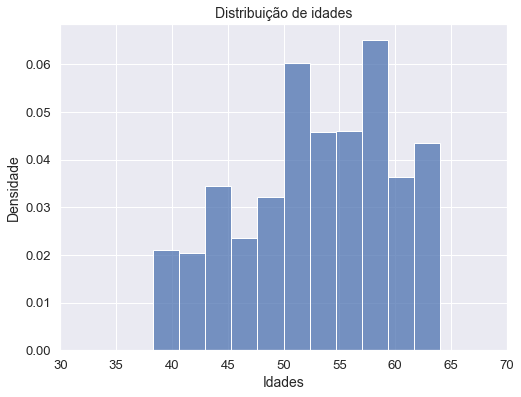

In [18]:
# Densidade de distribuição das idades

plt.figure(figsize=(8,6))
sns.histplot(dados['idade'], stat='density', bins=15)
plt.ylabel('Densidade', fontsize=14)
plt.title('Distribuição de idades', fontsize=14)
plt.xlabel('Idades', fontsize=14)
plt.xlim(30, 70)
plt.show()

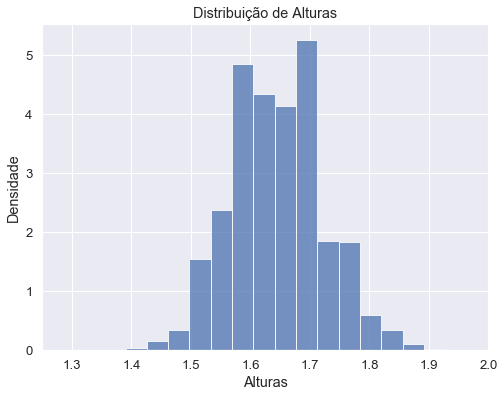

In [19]:
# Densidade de distribuição da altura

plt.figure(figsize=(8,6))
sns.histplot(dados['altura'], stat = 'density', bins=50)
plt.ylabel('Densidade')
plt.title('Distribuição de Alturas')
plt.xlabel('Alturas')
plt.xlim (1.25, 2.00)
plt.show()

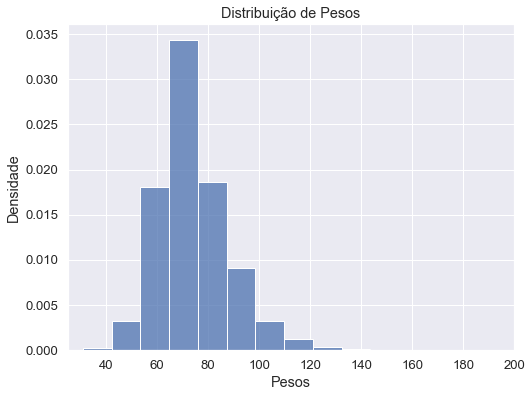

In [20]:
# Distribuição de pesos

plt.figure(figsize=(8,6))
sns.histplot(dados['peso'], stat='density', bins=15)
plt.ylabel('Densidade')
plt.title('Distribuição de Pesos')
plt.xlabel('Pesos')
plt.xlim(25,200)
plt.show()

<h3>Análise das Variáveis Quantitativas </h3>

In [21]:
# Separando os dados entre Cardíacos e Saudáveis para Análise de Dados
cardiacos = dados.loc[dados.cardio == 'presente',:]
saudaveis = dados.loc[dados.cardio == 'ausente',:]

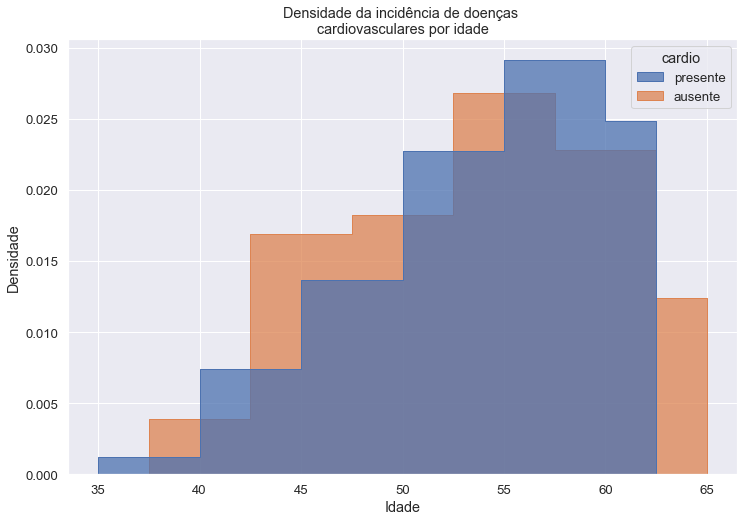

In [22]:
faixa_idade = np.arange(35, 70, 5)
plt.figure(figsize=(12,8))

# Plota hitograma de idade em função da categoria cardio
sns.histplot(dados, x='idade', hue='cardio', hue_order=['presente', 'ausente'], multiple='dodge',
             stat='density', bins=faixa_idade, element='step' )
plt.ylabel('Densidade')
plt.xlabel('Idade')
plt.title('Densidade da incidência de doenças \ncardiovasculares por idade')
plt.fontsize=14
plt.show()


Percebe-se que a maioria dos cardíacos estão na faixa de 50 a 60 anos.

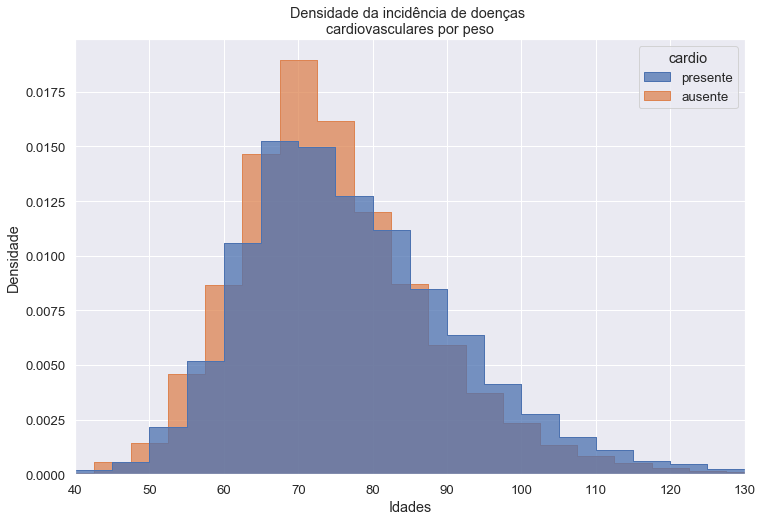

In [23]:
faixa_peso = np.arange(30, 150, 5)
plt.figure(figsize=(12,8))

# Plota histograma de peso em função da categoria cardio
sns.histplot(dados, x='peso', hue='cardio', hue_order=['presente', 'ausente'], multiple='dodge',
             bins=faixa_peso, stat='density', element='step') 
plt.ylabel('Densidade')
plt.title('Distribuição de Pesos')
plt.xlabel('Idades')

plt.xlim((40, 130))
plt.title('Densidade da incidência de doenças \ncardiovasculares por peso');

Percebe-se que a maioria dos cardíacos estão têm por volta de 70 kg, mas com distribuição assimetrica para a direita.

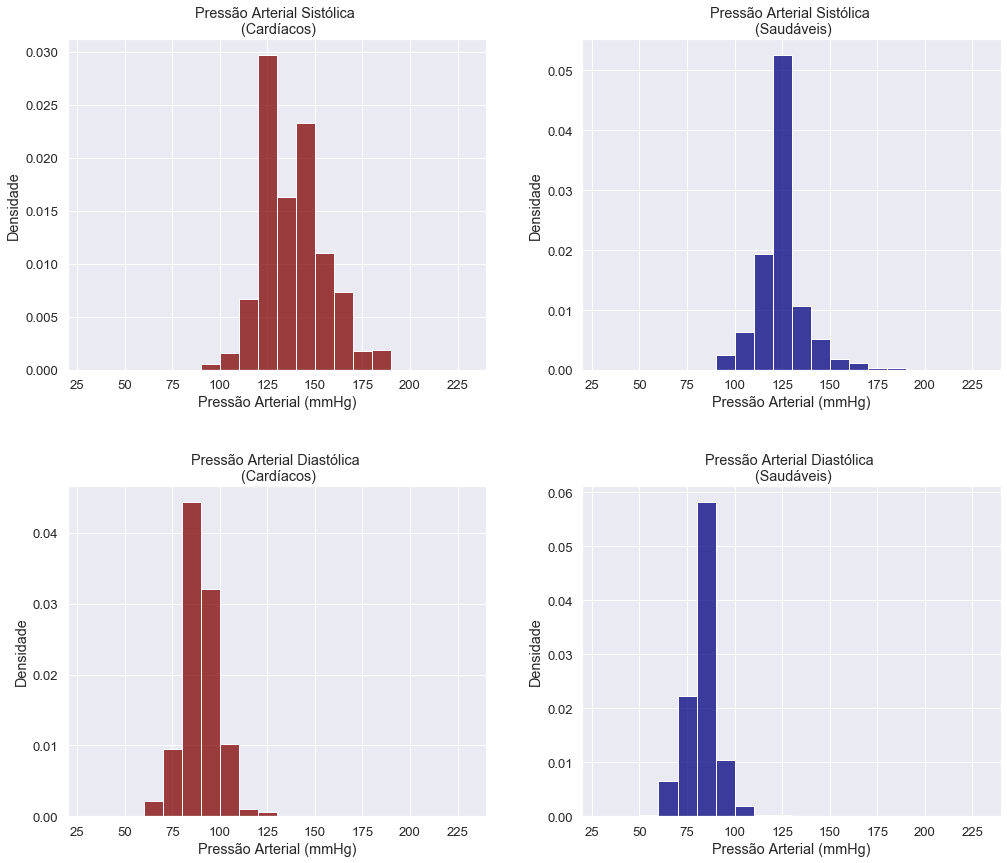

In [24]:
plt.figure(figsize=(15,13))

plt.subplot(2,2,1)
pa_sist_bins = np.arange(90, 200, 10)
# sns.distplot(cardiacos['pa_sist'], bins=pa_sist_bins, color='maroon')
sns.histplot(cardiacos, x='pa_sist', color='maroon', bins=pa_sist_bins, stat='density') #multiple='dodge'
plt.xlim(20, 240)
plt.title('Pressão Arterial Sistólica \n (Cardíacos)')
plt.xlabel('Pressão Arterial (mmHg)')
plt.ylabel('Densidade')

plt.subplot(2,2,2)
pa_diast_bins = np.arange(90, 200, 10)
# sns.distplot(saudaveis['pa_sist'], bins=pa_diast_bins, color='navy')
sns.histplot(saudaveis, x='pa_sist', color='navy', bins=pa_diast_bins, stat='density') #multiple='dodge'
plt.xlim(20, 240)
plt.title('Pressão Arterial Sistólica \n (Saudáveis)')
plt.xlabel('Pressão Arterial (mmHg)')
plt.ylabel('Densidade')

plt.subplot(2,2,3)
pa_sist_bins = np.arange(40, 140, 10)
# sns.distplot(cardiacos['pa_diast'], bins=pa_sist_bins, color='lightcoral')
sns.histplot(cardiacos, x='pa_diast', color='maroon', bins=pa_sist_bins, stat='density') #multiple='dodge'
plt.xlim(20, 240)
plt.title('Pressão Arterial Diastólica \n (Cardíacos)')
plt.xlabel('Pressão Arterial (mmHg)')
plt.ylabel('Densidade')

plt.subplot(2,2,4)
pa_diast_bins = np.arange(40, 140, 10)
# sns.distplot(saudaveis['pa_diast'], bins=pa_diast_bins, color='slateblue')
sns.histplot(saudaveis, x='pa_diast', color='navy', bins=pa_diast_bins, stat='density') #multiple='dodge'
plt.xlim(20, 240)
plt.title('Pressão Arterial Diastólica \n (Saudáveis)')
plt.xlabel('Pressão Arterial (mmHg)')
plt.ylabel('Densidade')

plt.tight_layout(pad=3.0)
plt.show()

## Análise das Variáveis Qualitativas

A seguir, pode-se observar como os dados se distribuem por cada Variável Qualitativa

In [147]:
# Dicionário com as propriedades dos gráficos
prop = {}
prop['variaveis'] = ['genero', 'fumante', 'alcool', 'colesterol', 'a_fisica','cardio']
prop['titulos'] = ['Distribuição da População', 'Distribuição de Cardíacos', 'Distribuição de Saudáveis']
prop['titulo_variavel'] = ['Gênero', 'Fumantes', 'Alcóolatras', 'Nível de Colesterol', 'Prática de Atividade Física', 'Target: cardio']
prop['labels'] = [['Masculino', 'Feminino'], ['Não-fumante', 'Fumante'], ['Não-consome', 'Consome'], 
                  ['Normal', 'Acima do normal', 'Muito acima do normal'], ['Não-praticante', 'Praticante'], ['Ausente', 'Presente']]

In [149]:
# Função que plota os gráficos de pizza
def grafico_pizza(n_linhas, n_colunas, dic):
    # configura tamanho da imagem
    plt.figure(figsize=(40,120))
    
    # Plota o gráfico inicial: Distribuição da Target
    plt.subplot(n_linhas, n_colunas, 2)
    dados[dic['variaveis'][5]].value_counts(sort=False).plot.pie(autopct='%1.1f%%', explode= [0.05, 0],
                                                                               textprops={'fontsize': 34},
                                               startangle = 90, labels=dic['labels'][5] , 
                                               colors=['#1E9E58', '#EBA72D', '#44EB90'])
    titulo = 'Distribuição de Pacientes \n Cardíacos ou Saudáveis'
    plt.title(titulo, fontsize=34)
    plt.legend(loc=8, title = dic['titulo_variavel'][5], title_fontsize=32, 
               bbox_to_anchor=(0.25, -0.25, 0.5, 0.5),  fontsize=32)
    
    # Configuração para Plotar Gráficos automaticamente a partir da linha 2
    i=4
    linha = 2
    coluna = 1
    explode=[0.05,0]
    while linha <= n_linhas:
        plt.subplot(n_linhas, n_colunas, i)
        if dic['variaveis'][linha-2] == 'colesterol':
            explode = [0.05, 0.05, 0]
        else:
            explode = [0.05, 0]
        if i % 3 == 1: # Primeira coluna
            coluna = 1
            dados[dic['variaveis'][linha-2]].value_counts(sort=False).plot.pie(autopct='%1.1f%%', explode= explode,
                                                                               textprops={'fontsize': 34},
                                               startangle = 90, labels=dic['labels'][linha-2] , 
                                               colors=['#1E9E58', '#EBA72D', '#44EB90'])
            titulo = dic['titulos'][coluna-1] + '\n por ' + dic['titulo_variavel'][linha-2]
            plt.title(titulo, fontsize=34)
            plt.legend(loc=8, title = dic['titulo_variavel'][linha-2], title_fontsize=28, 
                       bbox_to_anchor=(0.25, -0.25, 0.5, 0.5),  fontsize=28)
            i += 1
        elif i % 3 ==2: # Segunda coluna
            coluna = 2
            cardiacos[dic['variaveis'][linha-2]].value_counts(sort=False).plot.pie(autopct='%1.1f%%', explode= explode,
                                                                                   textprops={'fontsize': 34},
                                               startangle = 90, labels=dic['labels'][linha-2] ,
                                               colors=['#E64C49', '#AD0603', '#E69797'])
            titulo = dic['titulos'][coluna-1] + '\n por ' + dic['titulo_variavel'][linha-2]
            plt.title(titulo, fontsize=34)
            plt.legend(loc=8, title = dic['titulo_variavel'][linha-2], title_fontsize=28, 
                       bbox_to_anchor=(0.25, -0.25, 0.5, 0.5),  fontsize=28)
            i += 1
        elif i % 3 ==0: # Terceira coluna
            coluna = 3
            saudaveis[dic['variaveis'][linha-2]].value_counts(sort=False).plot.pie(autopct='%1.1f%%', explode= explode,
                                                                                   textprops={'fontsize': 34},
                                               startangle = 90, labels=dic['labels'][linha-2],
                                               colors=['#6EA8E6', '#1F64AD', '#B6CFEA'])
            titulo = dic['titulos'][coluna-1] + '\n por ' + dic['titulo_variavel'][linha-2]
            plt.title(titulo, fontsize=34)
            plt.legend(loc=8, title = dic['titulo_variavel'][linha-2], title_fontsize=28, 
                       bbox_to_anchor=(0.25, -0.25, 0.5, 0.5),  fontsize=28)
            i += 1
            linha +=1
            
    plt.show()    

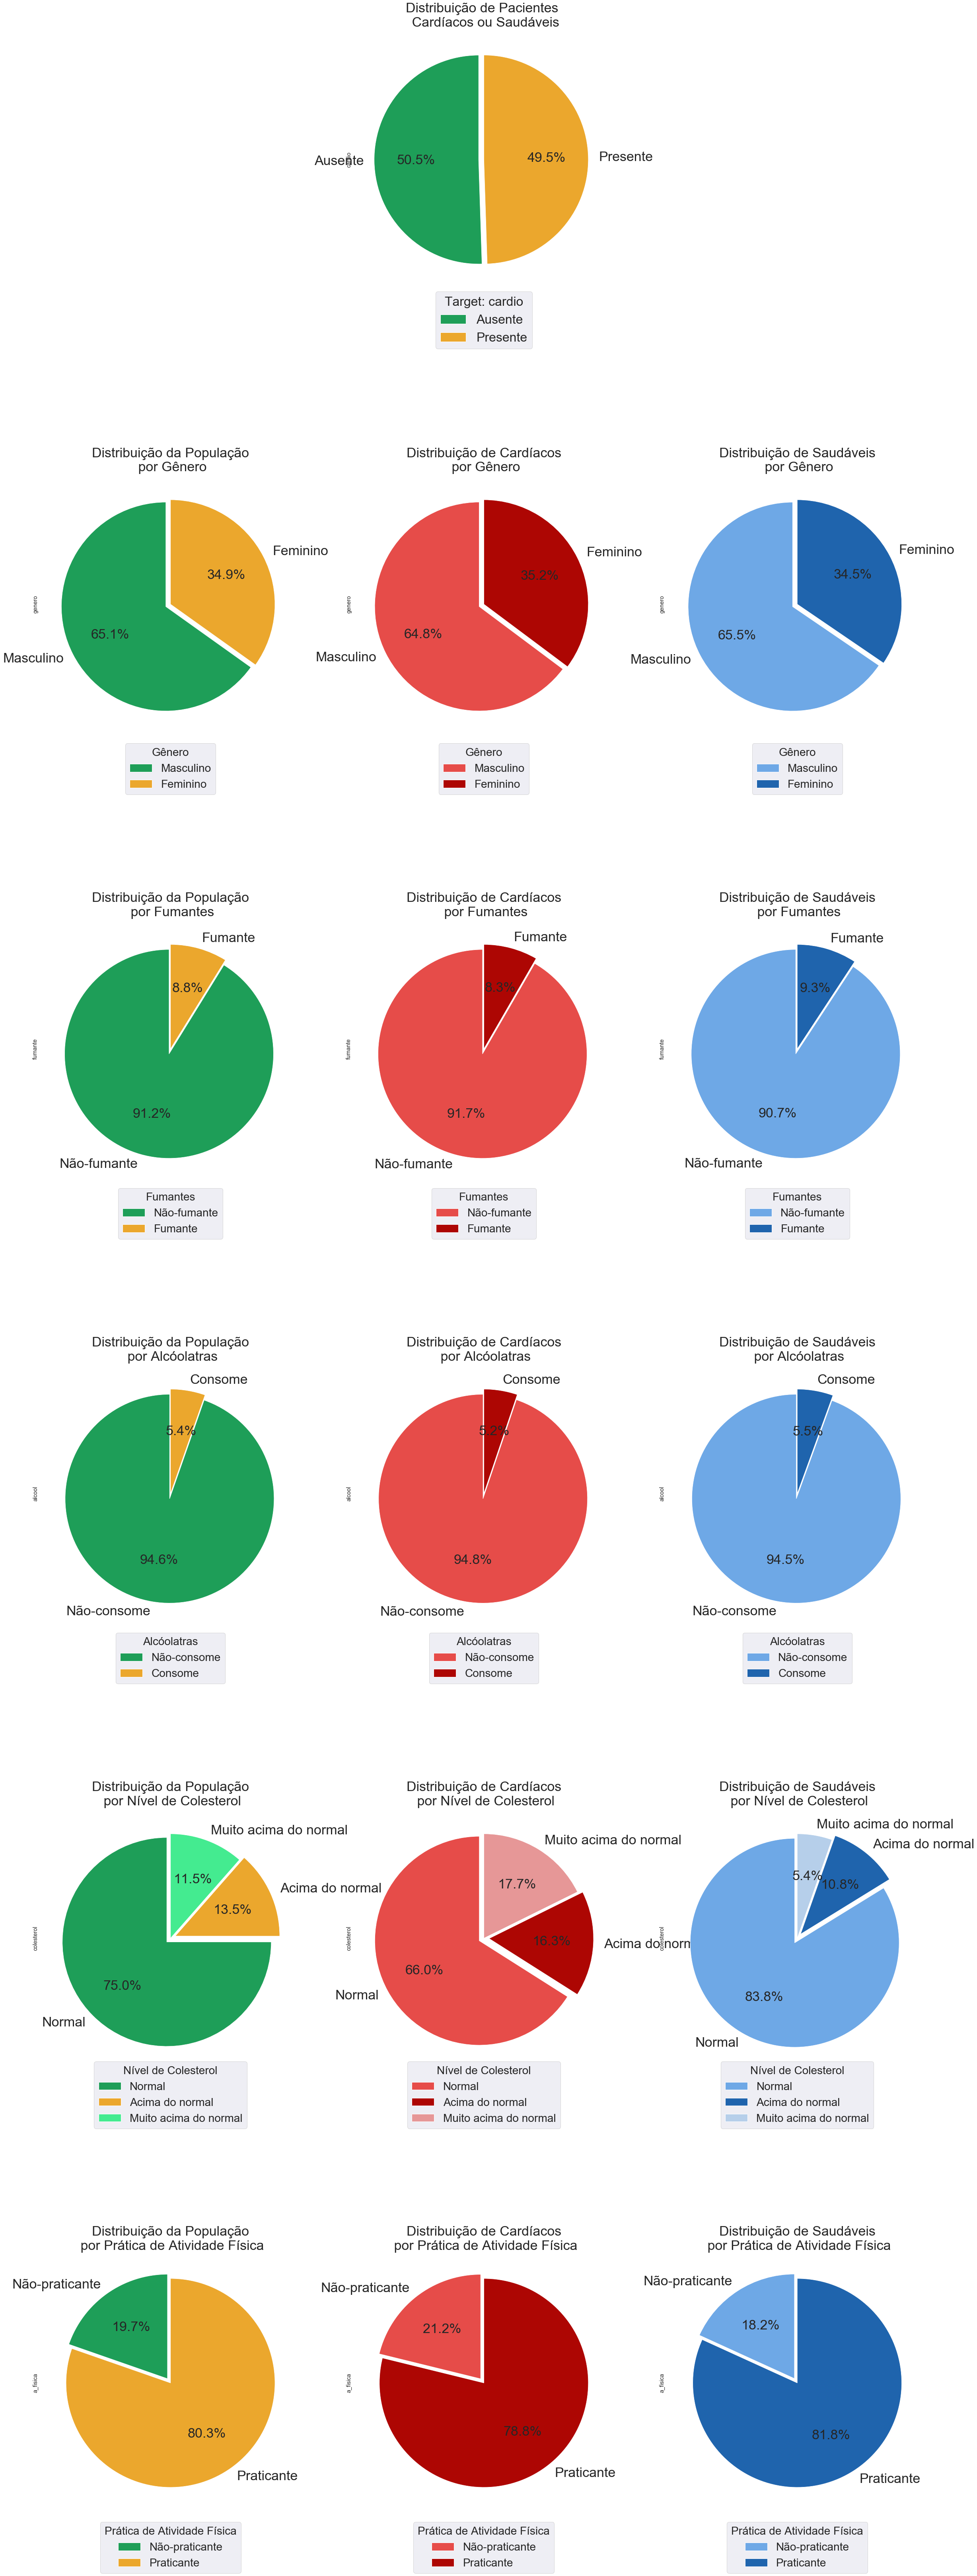

In [150]:
# Plotando os gráficos
grafico_pizza (6, 3, prop)

### Discussão:

Percebe-se que, no geral, os dados estão igualmente distribuídos entre _cardíacos_ e _saudáveis_ , não havendo grandes diferenças entre eles, exceto pelo _nível de colesterol_ , o que já pode se mostrar como um possível indicador para alertar possíveis cardíacos. Ao todo, percebe-se que a maioria da população estudada pratica ativiade física, tem nível de colesterol normal, 

___
# Modelos Preditivos

## 1. Árvore de Decisão (Decision Tree Classifier)

### O que é uma arvore de decisão?

Você já deve ter visto alguns fluxogramas ou esquemas gráficos que ligam uma série de decisões que são tomadas sequencialmente, sempre dependendo da decisão tomada anteriormente, como o do exemplo abaixo:


<img src="./image/fluxograma_pp.png" width="400" alt="fluxograma">

Extraída de: [UFES](https://etica.ufes.br/fluxograma) 

As Árvores de Decisão são muito parecidas com o esquema acima. Elas funcionam como um mapa de todas os possíveis resultados e probabilidades de acordo com as *features* que se apresentam relacionadas ao problema. Em *machine learning*, as árvores de decisão consistem em métodos de aprendizagem supervisionado, podendo ser utilizadas em tarefas de classificação (quando a variável *target* é categórica) ou regressão (quando a variável *target* é numérica).

Para compreender melhor a árvore de decisão, veja alguns conceitos:

- **Nó raiz (ou nó pai)**: É o nó de maior importância (Ganho, em termos matemáticos \$-$ que será visto em breve) a partir do qual os dados passam a ser subdivididos em outros sub-nós.
- **Nó de decisão**: São as subamostras que se dividem em mais subamostras ou sub-nós (não são o término de uma remificação).
- **Nó filho (ou folha)**: São as subamostras em que não ocorrem mais subdivisões

A figura a seguir deixa mais claro os conceitos acima.

<img src="./image/decision-tree-classification-algorithm.png" width="400" alt="arvore de decisao">


Fonte: [JavaTpoint](https://www.javatpoint.com/machine-learning-decision-tree-classification-algorithm)


O nó verde representa o nó pai, os nós azuis representam os nós de decisão e os nós em cor de rosa representam os nós filhos (ou folhas)

### Como construir uma árvore de decisão?

Como qualquer modelo de *machine learning*, é necessário entender um pouco do processo matemárico que o embasa. A árvore de decisão que será construida nesse modelo será utilizada para classificação. Para esse caso, há 2 critérios de divisão mais conhecidos: *Entropia* e *Índice de Gini*.

**A) Entropia**

A Entropia é mais conhecida por medir o "grau de desordem" de um sistema. Nas árvores de decisão, a entropia mede a falta de *homogeneidade* de uma amostra, isto é, mede a impureza dos dados relacionados à sua classificação. Em outras palavras, a entropia faz o controle de como a Árvore decide a divisão dos dados.

O cálculo da entropia ($S$) pode ser feito conforme a equação:

$$Entropia (S) = - \sum_{i=1}^n p_i \cdot \log_{2}p_i$$

em que:
- $S$ é um conjunto de dados com $n$ classes diferentes
- $p_i$ é a fração de dados de $S$ que pertencem à classe $i$

A partir dos cálculos de Entropia, calcula-se o Ganho de informação que, em outras palavras, pode ser entendido como o grau de importância de um dado atributo. Assim, o ganho de um dado atributo $A$ de um conjunto de dados $S$ é dado por:

$$Ganho(S, A) = Entropia(S) - \sum_{v\in Valores(A)}\frac{\vert S_v \vert}{\vert S \vert}Entropia(S_v)$$

em que 
- $Valores(A)$ representa os possíveis valores de $A$
- $v$ é um elemento de $Valores(A)$
- $S_v$ é o subconjunto de $S$ quando $x=A$

**B) Índice de Gini**

O Índice de Gini é uma expressão matemática que calcula a impureza de um nó (grau de heterogeneidade dos dados) e é determinado por:

$$Gini = 1 - \sum_{i=1}^n p_i^2$$

em que:
- $p_i$ é a fração de cada classe em cada nó
- $n$ é o número de classes

> *Quando, nas árvores de classificação com partições binárias, se utiliza o critério de Gini tende-se a isolar num ramo os registros que representam a classe mais freqüente. Quando se utiliza a entropia, balanceia-se o número de registros em cada ramo.* (SILVA, Luiza Maria Oliveira da, p.44, 2005. Disponível [aqui](https://www.maxwell.vrac.puc-rio.br/colecao.php?strSecao=resultado&nrSeq=7587@1&msg=28#))

Neste projeto, a construção da Árvore de Decisão será feita com o critério da Entropia, tendo em vista o balanço de registros que esse método gera para cada ramo da árvore.

### Vantagens das Árvores de Decisão

- **Fácil compreensão**: sua representação gráfica ajuda a tornar o entendimento mais intuitivo, ainda que a pessoa não tenha habilidades técnicas na área.
- **Abrangência aos tipos de variáveis**: esse modelo é capaz de trabalhar tanto com variáveis numéricas como com categóricas.
- **Fácil manipulação com dados**: além de não exigir grandes manutenções na base de dados (consegue, até certo ponto, não ser influenciada por *outliers* ou valores faltantes), também ajuda na identificação das variáveis mais relevantes e significativas na predição da variável *target*.

### Desvantagens das Árvores de Decisão

- ***Overfitting***: é uma das dificuldades que se deve ter em mente ao trabalhar com Árvores de Decisão. O modelo pode se ajustar demais com facilidade aos dados de treino, tornando-o inviável como um classificador ao validar com outros conjuntos de dados.

### Implementação do modelo

A aplicação da árvore decisão será por meio da biblioteca do scikit-learn [(vide documentação)](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) (a importação encontra-se nas primeiras células deste documento). Para implementar o modelo, cria-se o modelo com *DecisionTreeClassifier()* e aplica o método *fit()*, que recebe os dados de treino e ajusta os dados para fazer classificações de quaisquer *datasets* no mesmo formato.

No objeto *DecisionTreeClassifier()*, há alguns argumentos importantes:

- **criterion**: é o critério com o qual a árvore será construída (*Gini* ou Entropia).
- **max_depth**: é a profundidade máxima da árvore. Esse argumento limita o tamanho da árvore, e deve ser utilizado com cautela, pois grande profundidade pode levar a *overfitting* e pequena demais pode tirar a capacidade do modelo de generalizar outros conjuntos de dados para classificar.



### Preparando a base de dados para implementação

Para a implementação de fato do modelo, é necessário dividir a base de dados em dois grupos:

- **Dados de treino**: esses dados serão aqueles utilizados para montar de fato o modelo, isto é, são os dados que ensinam ao computador como se comporta cada variável em relação a variável *target* e o quanto e como cada uma influenciará uma possível classificação.
- **Dados de teste**: esses dados serão aqueles utilizados para testar a precisão do modelo, isto é, são dados não iguais aos de treino para verificar o quão preciso está o modelo nas suas classificações.

A divisão desses dados será feita com o módulo *train_test_split()* do módulo *model_selection*, da biblioteca do *sckikit-learning* (a importação encontra-se nas primeiras células deste documento). Esse módulo recebe os dados de treino (sem a coluna da variável *target*) e os dados *target*, ou seja, recebe os dados do "eixo x" e do "eixo y", além de passar a fração com que deve ser feita a divisão (em geral, se utiliza de 20 a 30% dos dados para teste). Aqui, será utilizado 20% dos dados para teste.

As células abaixo mostram as etapas de preparação dos dados e implementação da árvore de decisão.

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# encoder = LabelEncoder()

# dados.loc[:, ['genero']] = encoder.fit_transform(dados.loc[:, ['genero']])
# dados.loc[:, ['colesterol']] = encoder.fit_transform(dados.loc[:, ['colesterol']])
# dados.loc[:, ['alcool']] = encoder.fit_transform(dados.loc[:, ['alcool']])
# dados.loc[:, ['a_fisica']] = encoder.fit_transform(dados.loc[:, ['a_fisica']])
# dados.loc[:, ['fumante']] = encoder.fit_transform(dados.loc[:, ['fumante']])
# dados.loc[:, ['glicose']] = encoder.fit_transform(dados.loc[:, ['glicose']])

In [31]:
target = 'cardio'

# Series com a variável target
dados_target = dados_num[target]

# Remove target
dados_num = dados_num.drop([target], axis=1)

# Separando os dados de treino e teste
dados_treino, dados_teste, target_treino, target_teste = train_test_split(dados_num, 
                                                                          dados_target, 
                                                                          test_size=0.2, 
                                                                          random_state=0)

In [32]:
# Cria árvore de decisão
arvore_decisao = DecisionTreeClassifier(criterion='entropy')

# Treina o modelo
modelo_dt = arvore_decisao.fit(dados_treino, target_treino)

# Calcula acurácia do modelo
acuracia_dt = arvore_decisao.score(dados_teste, target_teste) * 100
print(f'Precisão do modelo (Decision Tree): {acuracia_dt:.4f} %')

Precisão do modelo (Decision Tree): 64.2738 %


In [33]:
# Profundidade da árvore gerada
print(f'Profundidade da árvore: {modelo_dt.tree_.max_depth}')

Profundidade da árvore: 47


### Verificando resultado com Matriz de Confusão

A matriz de confusão é uma maneira de se avaliar o desempenho do modelo. Ela compara, por meio de uma tabela, os dados verdadeiros com os valores previstos para cada um. Assim, ela mostra 4 possibilidades:

- `Verdadeiro positivo`: é quando uma condição é positiva e a previsão também é positiva. No caso deste modelo, é quando o valor verdadeiro é 1 e o previsto também é 1. Ele é exibido no canto superior esquerdo.
- `Verdadeiro negativo`: é quando uma condição é negativa e a previsão também é negativa. No caso deste modelo, é quando o valor negativo é 0 e o previsto também é 0. Ele é exibido no canto inferior direito.
- `Falso positivo` (erro tipo I): é quando o modelo prevê a condição positiva (1) quando o valor verdadeiro é negativo (0)
- `Falso negativo` (erro tipo II): é quando o modelo prevê a condição negativa (0) quando o valor verdadeiro é positivo (1)

A biblioteca do scikit-learn já contém um módulo que plota essa matriz (a importação encontra-se nas primeiras células deste notebook). Veja a seguir a sua implementação:


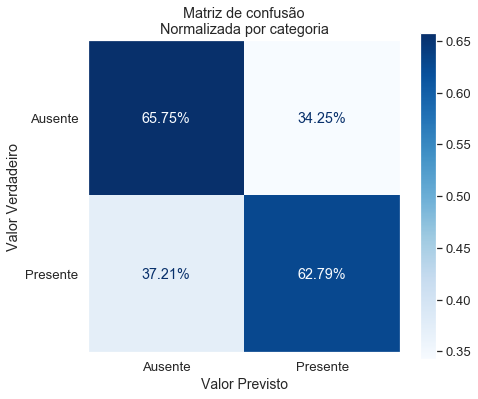

In [34]:
# Figura para plotagem do gráfico
fig, ax = plt.subplots(figsize=(7, 6))

# Cria e plota matriz de confusão
plot_confusion_matrix(modelo_dt, dados_teste, target_teste, 
                      normalize='true', display_labels=['Ausente', 'Presente'], 
                      cmap=plt.cm.Blues, ax=ax, values_format='.2%')
plt.xlabel("Valor Previsto", fontsize=14)
plt.ylabel("Valor Verdadeiro")
plt.title("Matriz de confusão\nNormalizada por categoria")
plt.grid(False)


A matriz de confusão acima traz os resultados <u> normalizados por cada categoria</u>, isto é:

- em relação aos dados cujo valor verdadeiro é *ausente*, 65.46% destes foram classificados como ausente (verdadeiro negativo), enqaunto os outros 34.54% foram classificados pelo modelo como presente (falso positivo).
- em relação aos dados cujo valor verdadeiro é *presente*, cerca de 62.73% foram classificados como *presente* (verdadeiro positivo), enquanto que os outros 37.27% foram classificados como ausente (falso negativo)


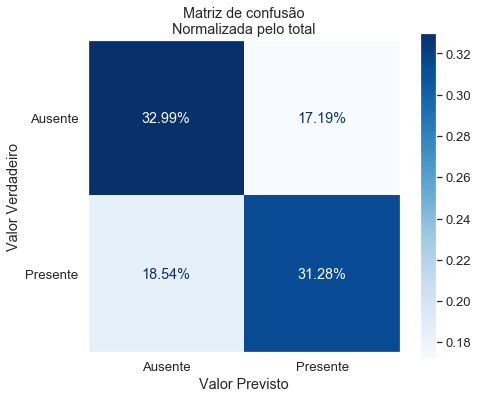

In [35]:
# Figura para plotagem do gráfico
fig, ax = plt.subplots(figsize=(7, 6))

# Cria e plota matriz de confusão
plot_confusion_matrix(modelo_dt, dados_teste, target_teste, 
                      normalize='all', display_labels=['Ausente', 'Presente'], 
                      cmap=plt.cm.Blues, ax=ax, values_format='.2%')
plt.xlabel("Valor Previsto")
plt.ylabel("Valor Verdadeiro")
plt.title("Matriz de confusão\nNormalizada pelo total")
plt.grid(False)

A matriz de confusão acima traz os resultados <u> normalizados pelo total</u> , isto é, mostra a porcentagem de coincidências entre os valores verdadeiros e a classificação efetuada pelo modelo. A soma entre os verdadeiros positivo e negativo resulta na acurácia de aproximadamente 64%.

### Validação Cruzada (*Cross-Validation*)

Uma técnica interessante para se avaliar o quão bem um modelo está generalizado, isto é, como ele desempenha frente a dados desconhecidos, é a validação cruzada. Diferentemente do processo feito anteriormente, no qual se fez uma divisão dos dados e então se verificou uma única vez a acurácia do modelo, esta técnica permite utilizar vários subconjuntos de dados a partir do próprio *dataset*.

A vantagem de se utilizar essa técnica é que se pode diminuir as variações de resultados em execuções diferentes do modelo. Uma única divisão dos dados, ainda que aleatória, pode enviesar o modelo fazendo-o parecer bem sucedido quando os dados de teste e treino são parecidos e, quando confrontado com dados desconhecidos, ficar aquém do esperado. Um ponto negativo da técnica é que, quanto maior o conjunto de dados, mais poder computacional será necessário.

#### Como funciona

Dentre as modalidades de validação cruzada existentes, será utilizada a *K-Fold*. Esse método pega o *dataset* e, a partir de um valor *k* definido pelo usuário, divide em dados de treino e teste, repetindo esse processo *k* vezes de forma a obter diferentes conjuntos de treino e teste em cada "rodada". A imagem abaixo esclarece mais esse processo:

<img src="image/kfold.jpg" alt="K-Fold" width="600">

[Fonte](https://gusrabbit.com/code/cross_validate/)

Na imagem acima, o conjunto de dados é embralhado *k* vezes, e em cada embaralhamento toma-se um subconjunto para validação. Por padrão, se utiliza $k = 5$ para evitar que os dados de teste sejam muito pequenos e tenham pouco potencial de avaliação. Porém, para maiores conjuntos de dados, é possível tomar valores maiores de *k*. Para o *dataset* deste projeto, utilizado $k = 10$ (como tem-se mais de 68745 linhas, cada subconjunto de validação teria em torno de 6874 linhas).

#### Implementação

Para implementar, é preciso apenas fazer a importação do módulo necessário (encontra-se nas primeiras células deste arquivo) e passar como argumentos o modelo, os dados das variávels independentes e da *target*, passar o valor de *k* e informar o tipo de avaliação que se quer obter (aqui, será utilizado *'accuracy'* para obter a acurácia.

Com os resultados, é possível ter uma melhor entendimento do desempenho do modelo calculando a média e o desvio padrão dos resultados.

In [36]:
# Calcula resultados
resultados_dt = cross_val_score(modelo_dt, dados_num, dados_target, cv=10, scoring='accuracy')

# Calcula média e desvio padrão (em porcentagem)
media_dt = np.mean(resultados_dt) * 100
desv_pad_dt = np.std(resultados_dt, ddof=1) * 100

# Exibe resultados
print('Cross Validation aplicado ao modelo de Árvore de Decisão: \n')
print(f'Média: {media_dt:.4f} %')
print(f'Desvio Padrão: {desv_pad_dt:.4f} %')

Cross Validation aplicado ao modelo de Árvore de Decisão: 

Média: 63.8970 %
Desvio Padrão: 0.6456 %


### Discussão
Tratando-se de um modelo voltado para classificar possíveis portadores de doenças cardiovasculares a partir de algumas de suas características, o ideal seria ampliar ainda mais sua acurácia, seja buscando novas features sobre os indivíduos, testando outras técnicas de machine learning, buscando mais aperfeiçoamentos para as técnicas aqui empregadas ou, de forma externa, buscando uma fonte de dados de melhor qualidade.

Além disso, com a aplicação da técnica de cross-validation, percebe-se que a média se encontra muito próxima do valor obtido em uma única aplicação, com um desvio padrão menor que 1%.

Uma das maneiras de tentar melhorar o modelo da árvore de decisão e diminuir as chances de overfitting é limitando o seu crescimento. Quanto maior a quantidade de variáveis envolvidas, maior fica o seu tamanho e também maior as chances daquele modelo se ajustar demais aos dados. Assim, é possível tentar generalizar mais o modelo limitando seu crescimento, utilizando em sua construção as variáveis que mais influenciam na target e excluindo as demais.

Como foi visto, a árvore anterior tinha profundidade de 47. O quanto é possível melhorar sua performance reduzindo sua profundidade máxima? Veja uma implementação na qual se gera dados de treino a partir da mesma base, treina o modelo e calcula sua acurácia para até 20.

In [37]:
def cria_arvore(X_dados, Y_dados, profundidade):
    # Separando os dados de treino e teste
    X_treino, X_teste, Y_treino, Y_teste = train_test_split(X_dados, 
                                                            Y_dados, 
                                                            test_size=0.2, 
                                                            random_state=0)
    
    # Cria árvore de decisão
    nova_arvore = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=n)
    # Treina o modelo
    novo_modelo = nova_arvore.fit(X_treino, Y_treino)
    # Calcula acurácia do modelo
    acc = nova_arvore.score(X_teste, Y_teste) * 100
    print(f'Profundidade (max_depth) = {profundidade:2.0f} | Acurácia: {acc:.2f} %')

# Mostra resultados de 2 a 20
for n in range(2, 21):
    cria_arvore(dados_num, dados_target, n)

Profundidade (max_depth) =  2 | Acurácia: 71.02 %
Profundidade (max_depth) =  3 | Acurácia: 72.24 %
Profundidade (max_depth) =  4 | Acurácia: 72.77 %
Profundidade (max_depth) =  5 | Acurácia: 73.25 %
Profundidade (max_depth) =  6 | Acurácia: 72.93 %
Profundidade (max_depth) =  7 | Acurácia: 72.90 %
Profundidade (max_depth) =  8 | Acurácia: 73.00 %
Profundidade (max_depth) =  9 | Acurácia: 73.13 %
Profundidade (max_depth) = 10 | Acurácia: 72.81 %
Profundidade (max_depth) = 11 | Acurácia: 72.63 %
Profundidade (max_depth) = 12 | Acurácia: 72.55 %
Profundidade (max_depth) = 13 | Acurácia: 72.09 %
Profundidade (max_depth) = 14 | Acurácia: 71.84 %
Profundidade (max_depth) = 15 | Acurácia: 71.07 %
Profundidade (max_depth) = 16 | Acurácia: 70.59 %
Profundidade (max_depth) = 17 | Acurácia: 70.13 %
Profundidade (max_depth) = 18 | Acurácia: 69.83 %
Profundidade (max_depth) = 19 | Acurácia: 69.04 %
Profundidade (max_depth) = 20 | Acurácia: 68.36 %


Há 2 pontos interessantes a serem notados com o resultado acima:

- Profundidades menores geraram melhores resultados nos testes.
- A partir de uma certa profundidade (em torno de 9), o desempenho do modelo começou a cair.

Como foi visto, o processo de limitar o tamanho da árvore de decisão pode ser uma medida plausível na tentativa de melhorar a performance. Contudo, há outras formas de se melhorar o modelo da Árvore de Decisão, mas mostrar cada uma aqui foge ao escopo do trabalho. Ao invés disso, pode-se utilizar outras técnicas de predição. Veja, a seguir,  a aplicação de um outro modelo que envolve não apenas uma, mas várias árvores de decisão: a **Floresta Aleatória**.


-------------
## 2. Floresta Aleatória (Random Forest Classifier)

### O que é?

**Random Forest (Floresta Aleatória)** é um tipo de de algoritmo supervisionado de *machine learning*, baseado em *ensemble learning* (aprendizado em conjunto $-$ um tipo de aprendizado onde se juntam diferentes tipos de algoritmos ou o mesmo algoritmo múltiplas vezes para formar um modelo de predição mais poderoso). 
O algoritmo do random forest combina múltiplos algoritmos do mesmo tipo, sendo composto por várias **Decision Trees (Árvores de Decisão)**, as quais formam uma *floresta de árvores*, ou seja, a *Random Forest*.

Ele utiliza o *'Bagging'* (que será detalhado a frente) e o *'Feature Randomness' (aleatoriedade de atributos)* para criar uma **Floresta Aleatória de Árvores não correlacionadas**. 

O princípio que move esse algoritmo pode ser resumido `sabedoria das massas`, ou seja: <u> "Um grande numero de modelos não correlacionados (árvores de decisão) operando em conjunto sobressairá a performance de qualquer modelo individualmente". </u> 

Esse método, além de ser empregado para a predição de doenças, também é utilizado por sistemas inteligentes para identificar objetos, como nos carros automáticos ou no Kinect (do Xbox).

<img src='image/usos da random forest.png' height=600px width = 800px > 

[Fonte: Simplilearn](https://www.youtube.com/watch?v=eM4uJ6XGnSM) 

### Como funciona?

O Algoritmo da Random Forest pode ser resumido nestes seguintes passos:

1. Escolha N dados aleatoriamente, com repetição, do <i>dataset</i>
2. Construa uma *Árvore de Decisão* com base nesses N valores
3. Escolha o número *n* de Árvores que você deseja em um sua floresta e repita os passos 1 e 2 *n* vezes
4. Nos casos de:
   1. uma **Regressão:**<br>
      O resultado final será a média do valor previsto em cada Árvore da Floresta.
   
   2. uma **Classificação:**<br>
      Cada árvore individual votará em um resultado. O resultado final será aquele que tiver a maior quantidade de      votos e, portanto, será a indicação do modelo.
      
      <img src='image/Random Forest - exemplo.jpeg'>
      
      No exemplo da imagem acima, poed-se observar uma floresta composta por 9 Árvores de Decisão independentes, aleatoriamente formadas e não correlacionadas. Do resultado, 6 preveram o desfecho "1" e 3 preveram o desfecho "0". Logo, o resultado final da Floresta será "1".

Como todo algoritmo, este modelo também possui seus pontos fortes e fracos, que serão evidenciados a seguir:
### Vantagens do Random Forest:
1. O algoritmo não é enviesado, uma vez que há múltiplas árvores, em que cada uma é treinada com um subconjunto dos dados. Basicamente, o algoritmo se apoia no *"poder da multidão"* para reduzir viéses individuais.
2. O algoritmo é muito estável. Mesmo que uma nova linha de dado seja incrementada ao *dataset*, o algoritmo não é fortemente impactado, uma vez que o novo dado afetará uma árvore, mas dificilmente afetará todas elas e, consequentemente, à floresta.
3. O algoritmo funciona bem tanto para variáveis numéricas quanto categóricas.
4. O algoritmo também funciona quando há dados faltantes.

### Desvantagens do Random Forest:
1. A maior desvantagem do algoritmo se dá em sua complexidade. Ele pode demandar altos recursos computacionais, a depender do número de árvores de decisão desejados ou até mesmo do tamanho da base de dados a ser trabalhada.
2. É uma técnica que demanda muito mais tempo, se comparada a outros algoritmos.

### Construção das Árvores

Para que o modelo seja eficiente, é necessário que as Árvores sejam não-correlacionadas ou que tenham pouca correlação entre si. Isso garante maior precisão nos resultados, pois o resultado final seria proveniente de modelos distintos, evitando vieses e o *overfiting*. Assim, as árvores protegem umas as outras de seus erros individuais (contanto que o erro não se repita constantemente, na mesma direção). Enquanto uma árvore pode estar errada, as outras estarão corretas. Dessa forma, como um grupo, as árvores de decisão conseguem caminhar para a direção correta. 

Para garantir que as árvores se diversifiquem, são utilizados dois métodos:

#### Bagging (Bootstrap Aggregation):

As **Árvores de Decisão** são muito sensíveis aos dados em que são treinadas (pequenas mudanças podem resultar em árvores estruturamente distintas). A *Random Forest* toma vantagem desse fator, simplesmente permitindo que as árvores sejam montadas de acordo com combinações aleatórias e repetidas do conjunto de dados do *dataset*, resultando, assim, em diferentes Árvores.

Por exemplo:

Se, num *dataset* de tamanho N temos os dados [1,2,3,4,5,6], cada Árvore de Decisão será alimentada com uma amostra de mesmo tamanho N, arranjada aleatoriamente com repetição. Assim, para construir uma árvore, podemos fornecer [1,2,2,3,5,5] para treinar a primeira; [2,2,4,5,6,6] para a segunda, e assim sucessivamente... Dessa forma, cada uma terá seus nós escolhidos de maneira a maximizar a distinção entre termos em cada sequência. Por fim, formar-se-á uma floresta com árvores de decisão distintas.


#### Feature Randomness: 

Numa Árvore de Decisão comum, no momento de dividir um nó, nós consideramos todos atributos possíveis e escolhemos aquele que retorna a melhor distinção entre os Nós da Esquerda e os da Direita. Em contrapartida, no Random Forest, cada Árvore seleciona os atributos aleatoriamente de um subconjunto de atributos. Isso instiga uma maior variabilidade entre as árvores do modelo, garantindo uma menor correlação entre elas.

<img src='image/Feature Randomness.jpeg'>

Na figura acima, pode-se notar a distinção entre o funcionamento do modelo clássico da Árvore de Decisão e o do Random Forest. No primeiro (em Azul), a Árvore pode escolher, dentre todos os atributos, aquele que gera maior distinção entre os elementos do nó: o atributo 1. No segundo, a Árvore só pode escolher o atributo de maior distinção dentro de um subconjunto arranjado aleatoriamente. Para a Árvore 1 do Random Forest, ela pode escolher entre os Atributos 2 e 3. Como o 2 é aquele que gera maior distinção, ela ficará com este. Para a Árvore 2 do Random Forest, ela pode escolher entre os Atributos 1 e 3. Como o  1º é aquele que gera maior distinção (utilizado pelo modelo de Árvore de Decisão covencional $-$ em azul), essa será a adotada para construir a árvore.

Por fim, no algoritmo da Random Forest, as árvores não são treinadas somente com arranjos diferentes de dados, mas também utilizam diferentes atributos para tomadas de decisão. Isso gera uma floresta de árvores não correlacionadas que protegem umas as outras de seus eventuais erros.

### Construindo o modelo

In [38]:
# Preparando as configuração para o Random Forest:

# especificando Variáveis Dependentes (Y) e Independetes (X)

nomes_variaveis = ['idade', 'genero', 'altura', 'peso', 'pa_sist', 'pa_diast', 
                   'colesterol', 'glicose', 'fumante', 'alcool', 'a_fisica']

# X = dados[nomes_variaveis]
X = dados_num
Y = dados_target

# Dividindo a base de dados para Treinamento (80%) e Teste (20%):

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2) 

In [39]:
# Criando um Classificador:

classificador = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Treinando o modelo com a base de dados

modelo_rf = classificador.fit(X_train, Y_train)

Y_previsto = classificador.predict(X_test)

In [40]:
# Checando a precisão:
acuracia_rf = metrics.accuracy_score(Y_test, Y_previsto)*100 
print(f'Precisão do Modelo (Random Forest): {acuracia_rf:.4f} %')

Precisão do Modelo (Random Forest): 70.7615 %


In [41]:
# Encontrando o grau de importância para cada variável independente:

importancia_variaveis = pd.Series(classificador.feature_importances_, index=nomes_variaveis).sort_values(ascending=False)
importancia_variaveis

peso          0.235965
altura        0.212877
pa_sist       0.179631
idade         0.163935
pa_diast      0.094592
colesterol    0.041499
glicose       0.019473
genero        0.018543
a_fisica      0.015089
fumante       0.010024
alcool        0.008373
dtype: float64

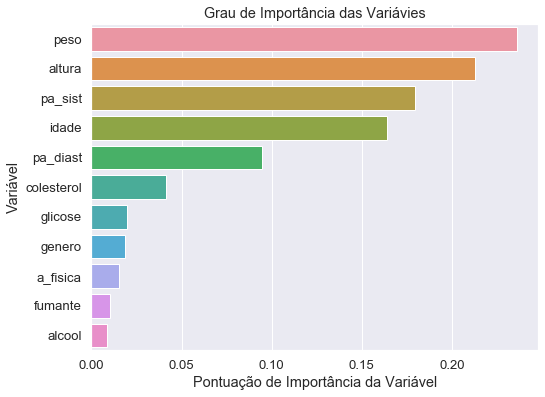

In [42]:
# Visualizando graficamente]
plt.figure(figsize=(8,6))
# sns.barplot(x=importancia_variaveis, y=importancia_variaveis.index, palette='Greens_r')
sns.barplot(x=importancia_variaveis, y=importancia_variaveis.index) # sem paletta de cores
plt.xlabel('Pontuação de Importância da Variável')
plt.ylabel('Variável')
plt.title("Grau de Importância das Variávies")
plt.show()

Neste gráfico, pode-se confirmar a hipótese inicial que tínhamos em relação ao colesterol. Das variáveis qualitativas, sendo a de maior influência na previsão de doenças cardiovasculares.

Obs.: Apesar de alguns atributos parecerem pouco importantes, como as *'alcool'* e *'fumante'*, ao removê-las do algoritmo, o resultado obtido tem um leve decréscimo na precisão, indicando que essas variáveis exercem certa influência no modelo.

Obs.2: Como descrito neste Notebook, a Random Forest gera amostras aleatórias para criar as Árvores de Decisão. Logo, cada vez que o código é executado, uma floresta diferente é gerada e, portanto, os resultados de acurácia são diferentes, mas têm um valor muito próximo.

### Verificando o resultado com a Matriz de Confusão:

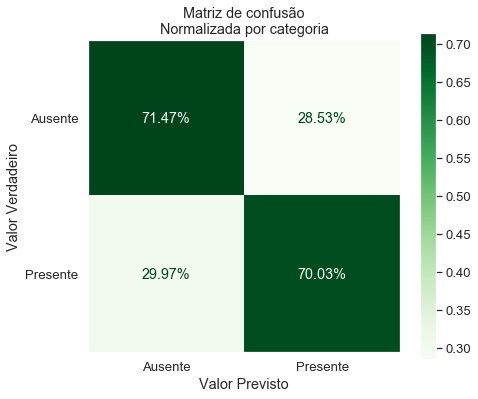

In [43]:
# Figura para plotagem do gráfico
fig, ax = plt.subplots(figsize=(7, 6))

# Cria e plota matriz de confusão
plot_confusion_matrix(classificador, X_test, Y_test, 
                      normalize='true', display_labels=['Ausente', 'Presente'], 
                      cmap=plt.cm.Greens, ax=ax, values_format='.2%')
plt.xlabel("Valor Previsto")
plt.ylabel("Valor Verdadeiro")
plt.title("Matriz de confusão\nNormalizada por categoria")
plt.grid(False)

A matriz de confusão acima traz os resultados <u> normalizados por cada categoria</u>, isto é:

- em relação aos dados cujo valor verdadeiro é *ausente*, 71.24% destes foram classificados como ausente (verdadeiro negativo), enqaunto os outros 28.76% foram classificados pelo modelo como presente (falso positivo).
- em relação aos dados cujo valor verdadeiro é *presente*, cerca de 69.23% foram classificados como *presente* (verdadeiro positivo), enquanto que os outros 30.77% foram classificados como ausente (falso negativo)


### Resultados com Validação Cruzada

In [151]:
# Calcula resultados
resultados_rf = cross_val_score(modelo_rf, dados_num, dados_target, cv=10, scoring='accuracy')

# Calcula média e desvio padrão (em porcentagem)
media_rf = np.mean(resultados_rf) * 100
desv_pad_rf = np.std(resultados_rf, ddof=1) * 100

# Exibe resultados
print('-'*59)
print('Cross Validation aplicado ao modelo de Regressão Logística:')
print('-'*59, '\n')
print(f'Média: {media_rf:.4f} %')
print(f'Desvio Padrão: {desv_pad_rf:.4f} %')

-----------------------------------------------------------
Cross Validation aplicado ao modelo de Regressão Logística:
----------------------------------------------------------- 

Média: 70.7848 %
Desvio Padrão: 0.8086 %


## Discussão:

Percebe-se, portanto, que o modelo preditivo para Doenças Cardiovasculares utilizando o Algoritmo da Random Forest para Classificação tem uma acurácia razoável, oscilando em cerca de 70%. Tal resultado pode ser aprimorado, conforme se ajuste as especificações do modelo $-$ como o número de árvores, por exemplo $-$, ou, de forma externa, caso a coleta de dados siga maior rigor de qualidade, conforme descrito anteriormente.

Apesar disso, como era de se esperar, a Random Forest obteve um resultado melhor que a Decision Tree, uma vez que ela é capaz de sanar algumas problemas da Árvore de Decisão, como o *overfiting* e o menor enviesamento, uma vez que ela utiliza diversas Árvores ao mesmo tempo.

-------------

## 3. Regressão Logística (Logistic Regression)

### Intuição e conceitos

A regressão logística é um tipo de regressão na qual se obtém probabilidades de um determinado evento ocorrer, tornando-a o melhor tipo de regressão quando a variável *target* é categórica, ou seja, quando assume apenas valores binários (ou seja, 0 ou 1, Verdadeiro/Falso, e no caso deste projeto: Ausente/Presente), e por isso será utilizada aqui.

E como usar uma regressão em classificação? Para compreender melhor essa ideia, tome a seguinte imagem abaixo:

<img src="./image/sigmoid.png" alt="sigmoid" width=450>

Fonte: [medium](https://medium.com/@ODSC/logistic-regression-with-python-ede39f8573c7)

No eixo Y, correspondente à variável *target*, encontram-se plotados os possíveis de valores que ela pode assumir (0 ou 1) em função de X (variável independente). Uma **regressão linear** traça uma reta que melhor se ajusta a uma nuvem de pontos com distribuição qualquer no plano (note que, no caso de Y ser binário, não se forma uma nuvem de pontos, mas duas faixas horizontais de pontos). Já a **regressão logística** começa buscando uma relação linear dos pontos, e então implementa uma não linearidade com o formato de uma ***sigmoide***, cuja representação está no gráfico à direita da imagem anterior.

**Função Sigmoide**

$$f(x) = \frac{1}{1+e^{-y}}$$

É a função acima que é responsável pelo processo "curvar" a reta traçada aos pontos de dados. Ela retorna a probabilidade de classificação de um item (isso quer dizer que os valores variam de 0 a 1). Normalmente, a classificação é feita da seguinte forma:

- se $f(x) < 0.5$, então é classificado como $0$.
- caso contrário, é classificado como $1$.

Como foi dito, essa regressão é feita a partir do caso linear. O valor de $y$ na função sigmoide provém da equação da reta obtida pelo ajuste linear dos dados, isto é:

$$y = b_0 + b_1 x_1 + b_2 x_2 + {...} + b_n x_n$$

em que $b_0$, $b_1$, $b_2$, ..., $b_n$ são coeficientes estimados com o conjunto de dados pela técnica da máxima verossimilhança, cujo objetivo é encontrar esses parâmetros que dêem a maior probabilidade possível da amostra ter sido observada. [fonte pra colocar no final depois](https://edisciplinas.usp.br/pluginfile.php/3769787/mod_resource/content/1/09_RegressaoLogistica.pdf) Então, chega-se à equação que modela essa regressão:

$$\ln \displaystyle \left(\frac{y}{1 - y}\right) = b_0 + b_1 x_1 + b_2 x_2 + \dots + b_n x_n$$

**Vantagens da Regressão Logística**

- Os resultados do modelo já são fornecidos em probabilidade, isto é, pode-se aproveitar tanto o quesito de classificação quanto à probabilidade de ocorrência daquela classificação.
- Em comparação à Árvore de Decisão, é um modelo mais robusto a *overfitting*.
- Pode-se definir um limite de decisão em termos de probabilidade.

### Implementação

O modelo de regressão logística será implementado com o método [*LogisticRegression()*](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), do módulo de modelos lineares do *scikit-learning*. As etapas de construção seguem o mesmo padrão dos modelos anteriores: separação da base de dados em teste e treino, contrução do modelo e cálculo da acurácia com os dados de teste.

In [49]:
# Separando os dados de treino e teste
dados_treino, dados_teste, target_treino, target_teste = train_test_split(dados_num, 
                                                                          dados_target, 
                                                                          test_size=0.2, 
                                                                          random_state=0)

# Cria e treina modelo
modelo_lr = LogisticRegression(random_state=0).fit(dados_treino, target_treino)

# Testa modelo
acuracia_lr = modelo_lr.score(dados_teste, target_teste)*100
print(f'Acurácia do modelo (Regressão Logística): {acuracia_lr:.4f} %')

Acurácia do modelo (Regressão Logística): 72.1143 %


### Matriz de Confusão

Da mesma forma que nos outros modelos, será apresentado o resultado em matriz de confusão, para verificar a performance do modelo em cada subgrupo e em relação ao total.

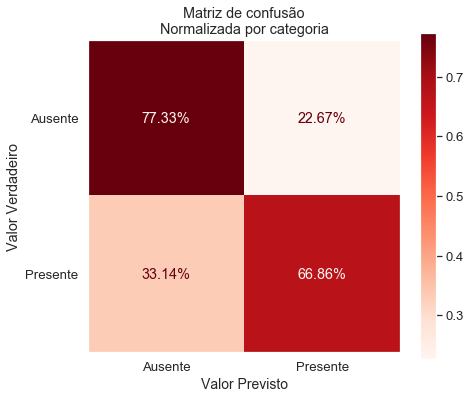

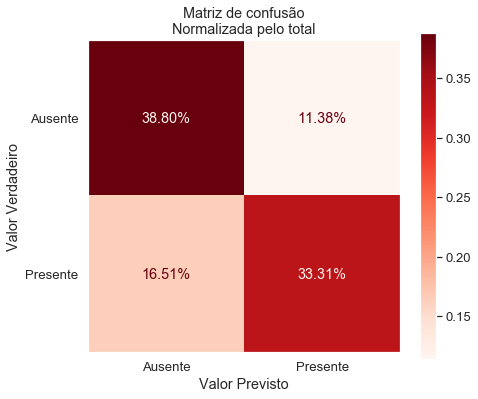

In [66]:
# Figura para plotagem do gráfico
fig, ax = plt.subplots(figsize=(7, 6))

# Cria e plota matriz de confusão
plot_confusion_matrix(modelo_lr, dados_teste, target_teste, 
                      normalize='true', display_labels=['Ausente', 'Presente'], 
                      cmap=plt.cm.Reds, ax=ax, values_format='.2%')
plt.xlabel("Valor Previsto", fontsize=14)
plt.ylabel("Valor Verdadeiro")
plt.title("Matriz de confusão\nNormalizada por categoria")
plt.grid(False)

# Figura para plotagem do gráfico
fig, ax = plt.subplots(figsize=(7, 6))

# Cria e plota matriz de confusão
plot_confusion_matrix(modelo_lr, dados_teste, target_teste, 
                      normalize='all', display_labels=['Ausente', 'Presente'], 
                      cmap=plt.cm.Reds, ax=ax, values_format='.2%')
plt.xlabel("Valor Previsto")
plt.ylabel("Valor Verdadeiro")
plt.title("Matriz de confusão\nNormalizada pelo total")
plt.grid(False)

### Validação Cruzada

In [57]:
# Calcula resultados
resultados_lr = cross_val_score(modelo_lr, dados_num, dados_target, cv=10, scoring='accuracy')

# Calcula média e desvio padrão (em porcentagem)
media_lr = np.mean(resultados_lr) * 100
desv_pad_lr = np.std(resultados_lr, ddof=1) * 100

# Exibe resultados
print('-'*59)
print('Cross Validation aplicado ao modelo de Regressão Logística:')
print('-'*59, '\n')
print(f'Média: {media_lr:.4f} %')
print(f'Desvio Padrão: {desv_pad_lr:.4f} %')

-----------------------------------------------------------
Cross Validation aplicado ao modelo de Regressão Logística:
----------------------------------------------------------- 

Média: 71.7289 %
Desvio Padrão: 0.6754 %


# Avaliando os modelos:

In [47]:
# Exibe resultados obtidos por cada modelo
print('==='*9)
print('COMPARAÇÃO ENTRE OS MODELOS')
print('==='*9, '\n')
print(f'Decision Tree        |  Precisão: {acuracia_dt:.4f} % ')
print(f'Random Forest        |  Precisão: {acuracia_rf:.4f} % ')
print(f'Logistic Regression  |  Precisão: {acuracia_lr:.4f} % ')

COMPARAÇÃO ENTRE OS MODELOS

Decision Tree        |  Precisão: 64.2738 % 
Random Forest        |  Precisão: 70.7615 % 


NameError: name 'acuracia_lr' is not defined

In [48]:
# Exibe resultados obtidos por cada modelo na validação cruzada
print('COMPARAÇÃO ENTRE OS MODELOS NA VALIDAÇÃO CRUZADA \n')
print(f'Decision Tree        |  Média: {media_dt:.4f} %  | Desvio Padrão: {desv_pad_dt:.4f} %')
print(f'Random Forest        |  Média: {media_rf:.4f} %  | Desvio Padrão: {desv_pad_rf:.4f} % ')
print(f'Logistic Regression  |  Média: {media_lr:.4f} %  | Desvio Padrão: {desv_pad_lr:.4f} % ')

COMPARAÇÃO ENTRE OS MODELOS NA VALIDAÇÃO CRUZADA 

Decision Tree        |  Média: 63.8970 %  | Desvio Padrão: 0.6456 %


NameError: name 'media_rf' is not defined

# Conclusão

<font color=red> fazer uma tabela comparando os dados de Precisão de cada modelo e os erros de tipo 1 e 2 </font>

<h2> Referências </h2>

- [Dataset: Cardiovascular Disease Dataset](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset)

- [Entendendo a Leitura de Pressão Arterial](https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings)

- [Doenças Cardiovasculares](https://www.paho.org/pt/topicos/doencas-cardiovasculares)
- [Doenças Cardiovasculares - Drauzio Varella](https://drauziovarella.uol.com.br/doencas-e-sintomas/endocardite/#:~:text=Endocardite%20%C3%A9%20uma%20doen%C3%A7a%20que,cora%C3%A7%C3%A3o%20e%20as%20v%C3%A1lvulas%20card%C3%ADacas.)
- [Árvores de Decisão (PUC-rio)](https://www.maxwell.vrac.puc-rio.br/7587/7587_4.PDF)
- [Árvore de Decisão (prof. Luiz Alberto)](http://professorluizalberto.com.br/site/images/2020-1/Python%20%C3%81rvore%20de%20Decis%C3%A3o.pdf)
- [Guia sobre Random Forest (Towards Data Science)](https://towardsdatascience.com/understanding-random-forest-58381e0602d2)
- [Guia sobre Random Forest (Stack Abuse)](https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/)